# Zomato Restaurant Analysis

## Explonatory Data Analysis - Resturants, Zomato

I really get fascinated by good quality food being served in the restaurants and would like to help community find the best cuisines around their area.

Zomato API Analysis is one of the most useful analysis for foodies who want to taste the best cuisines of every part of the world which lies in their budget. This analysis is also for those who want to find the value for money restaurants in various parts of the country for the cuisines. Additionally, this analysis caters the needs of people who are striving to get the best cuisine of the country and which locality of that country serves that cuisines with maximum number of restaurants.♨️




## Content

- Restaurant Id: Unique id of every restaurant across various cities of the world
- Restaurant Name: Name of the restaurant
- Country Code: Country in which restaurant is located
- City: City in which restaurant is located
- Address: Address of the restaurant
- Locality: Location in the city
- Locality Verbose: Detailed description of the locality
-_Longitude: Longitude coordinate of the restaurant's location
- Latitude: Latitude coordinate of the restaurant's location
- Cuisines: Cuisines offered by the restaurant
- Average Cost for two: Cost for two people in different currencies 👫
- Currency: Currency of the country
- Has Table booking: yes/no
- Has Online delivery: yes/ no
- Is delivering: yes/ no
- Switch to order menu: yes/no
- Price range: range of price of food
- Aggregate Rating: Average rating out of 5
- Rating color: depending upon the average rating color
- Rating text: text on the basis of rating of rating
- Votes: Number of ratings casted by people

## Index of contents

In [ ]:
from google.colab import files
files.upload()

! pip install opendatasets --upgrade
import opendatasets as od

dataset_url = 'https://www.kaggle.com/shrutimehta/zomato-restaurants-data'
od.download(dataset_url)

Saving kaggle.json to kaggle (1).json
Requirement already up-to-date: opendatasets in /usr/local/lib/python3.7/dist-packages (0.1.10)


100%|██████████| 5.47M/5.47M [00:00<00:00, 170MB/s]

## Importing Dataset

<a id='Importing Dataset'></a>

In [ ]:
import pandas as pd

df = pd.read_csv('/content/zomato-restaurants-data/zomato.csv', engine='python')

df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [ ]:
df.shape

(9551, 21)

In [ ]:
## Checking if dataset contains any null

nan_values = df.isna()
nan_columns = nan_values.any()

columns_with_nan = df.columns[nan_columns].tolist()
print(columns_with_nan)

['Cuisines']


Cuisines seems to contain null values. Hence any futher anlysis involving Cuisines the NaN values has to be considered.

In [ ]:
df1 = pd.read_excel('/content/zomato-restaurants-data/Country-Code.xlsx')
df1.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


Let us merge both the datasets. This will help us to understand the dataset contrywise.

In [ ]:
df2 = pd.merge(df,df1,on='Country Code',how='left')
df2.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


## Exploratory Analysis and Visualization

Before we ask question on the dataset, it would be helpful to understand the resturants geographical spread, understanding the rating, Currency, Online Delivery, City coverage..etc

### List of counteries the survey is spread accross

In [ ]:
print('List of counteris the survey is spread accross - ')
for x in pd.unique(df2.Country): print(x)
print()
print('Total number to country', len(pd.unique(df2.Country)))

List of counteris the survey is spread accross - 
Phillipines
Brazil
United States
Australia
Canada
Singapore
UAE
India
Indonesia
New Zealand
United Kingdom
Qatar
South Africa
Sri Lanka
Turkey

Total number to country 15


The survey seems to have spread accoss 15 counteries. This shows that Zomata is a multinational company having acitive business in all those counteries.

In [ ]:
from plotly.offline import init_notebook_mode, plot, iplot

labels = list(df2.Country.value_counts().index)
values = list(df2.Country.value_counts().values)

fig = {
    "data":[
        {
            "labels" : labels,
            "values" : values,
            "hoverinfo" : 'label+percent',
            "domain": {"x": [0, .9]},
            "hole" : 0.6,
            "type" : "pie",
            "rotation":120,
        },
    ],
    "layout": {
        "title" : "Zomato's Presence around the World",
        "annotations": [
            {
                "font": {"size":20},
                "showarrow": True,
                "text": "Countries",
                "x":0.2,
                "y":0.9,
            },
        ]
    }
}

iplot(fig)

As Zomato is a startup from india hence it makes sense that it has maximun business spread across resturants in India

### Understanding the Rating aggregate, color and text

In [ ]:
df3 = df2.groupby(['Aggregate rating','Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
df3
df3

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


The above information helps us to understand the realation between Aggregate rating, color and text. We conclude the following color assigned to the ratings:

- Rating 0 - White - Not rated
- Rating 1.8 to 2.4 - Red - Poor
- Rating 2.5 to 3.4 - Orange - Average
- Rating 3.5 to 3.9 - Yellow - Good
- Rating 4.0 to 4.4 - Green - Very Good
- Rating 4.5 to 4.9 - Dark Green - Excellent


Let us try to understand the spread of rating across resturants

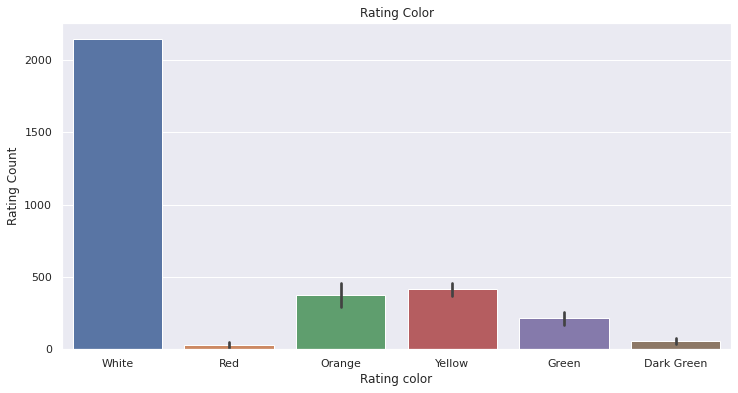

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

plt.figure(figsize=(12,6))
# plt.xticks(rotation=75)
plt.title('Rating Color')
sns.barplot(x=df3['Rating color'], y=df3['Rating Count']);

Interesting, Maximum resturants seems to have gone No ratings. Let us check if these resturants belong to some specific country.

In [ ]:
No_rating = df2[df2['Rating color']=='White'].groupby('Country').size().reset_index().rename(columns={0:'Rating Count'})
No_rating

,Country,Rating Count
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


India seems to have maximum unrated resturants. In India the culutre of odering online food is still gaining momentum hence most of the resturants are still unrated on Zomato as people might be preferring to visit the resturanting for a meal.

### Country and Currency

In [ ]:
country_currency = df2[['Country','Currency']].groupby(['Country','Currency']).size().reset_index(name='count').drop('count', axis=1, inplace=False)
country_currency.sort_values('Currency').reset_index(drop=True)

,Country,Currency
0,Phillipines,Botswana Pula(P)
1,Brazil,Brazilian Real(R$)
2,Australia,Dollar($)
3,Canada,Dollar($)
4,Singapore,Dollar($)
5,United States,Dollar($)
6,UAE,Emirati Diram(AED)
7,India,Indian Rupees(Rs.)
8,Indonesia,Indonesian Rupiah(IDR)
9,New Zealand,NewZealand($)


Above table display country and the currency they accept. Interstingly four counteries seems to be accepting curreny in dollars.

### Online delivery distribution

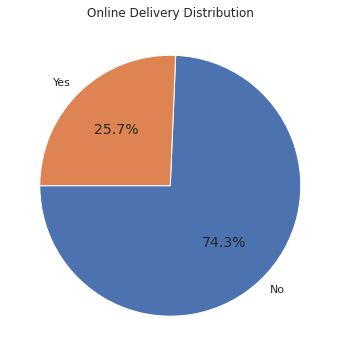

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Online Delivery Distribution')
plt.pie(df2['Has Online delivery'].value_counts()/9551*100, labels=df2['Has Online delivery'].value_counts().index, autopct='%1.1f%%', startangle=180);

Only 25% of restuarants accepts online delivery. This data might be biased as we have maximun resturants listed here are from India. Maybe analysis over city wise would be more helpful

###  Let us try to understand the coverage of city

In [ ]:
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
plt.figure(figsize=(12,6))
# import plotly.plotly as py

labels = list(df2.City.value_counts().head(20).index)
values = list(df2.City.value_counts().head(20).values)

fig = {
    "data":[
        {
            "labels" : labels,
            "values" : values,
            "hoverinfo" : 'label+percent',
            "domain": {"x": [0, .9]},
            "hole" : 0.6,
            "type" : "pie",
            "rotation":120,
        },
    ],
    "layout": {
        "title" : "Zomato's Presence Citywise",
        "annotations": [
            {
                "font": {"size":20},
                "showarrow": True,
                "text": "Cities",
                "x":0.2,
                "y":0.9,
            },
        ]
    }
}
iplot(fig);

<Figure size 864x432 with 0 Axes>

The data seems to be skewed towards New Delhi, Gurgaon and Noida. I see minimal data for other cities. **Hence I would do my analysis predominatly on New Delhi.**

## Asking and Answering Questions
We've already gained several insights about the resturants present in the survey. Let's ask some specific questions and try to answer them using data frame operations and visualizations.

### Q1: From which Locality maximum hotels are listed in Zomata

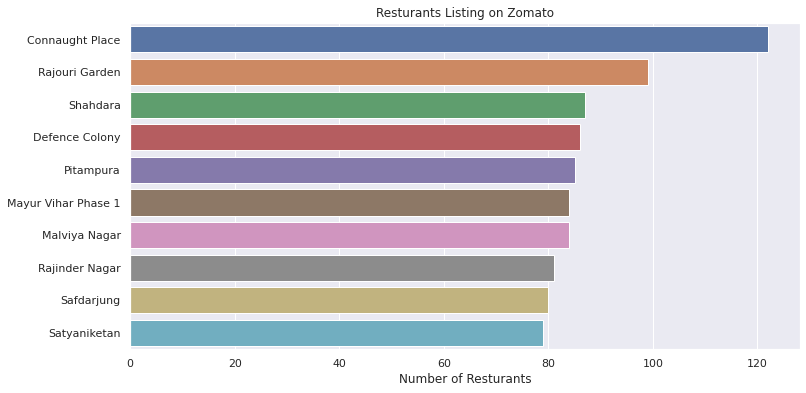

In [ ]:
Delhi = df2[(df2.City == 'New Delhi')]
plt.figure(figsize=(12,6))
sns.barplot(x=Delhi.Locality.value_counts().head(10), y=Delhi.Locality.value_counts().head(10).index)

plt.ylabel(None);
plt.xlabel('Number of Resturants')
plt.title('Resturants Listing on Zomato');

Connaught place seems to have high no of resturatants registered with Zomato, Let us understand the cuisines the top rated resturants has to offer

### Q2: What kind of Cusine these highly rates resturants offer

In [ ]:
# I achieve this by the following steps

## Fetching the resturants having 'Excellent' and 'Very Good' rating
ConnaughtPlace = Delhi[(Delhi.Locality.isin(['Connaught Place'])) & (Delhi['Rating text'].isin(['Excellent','Very Good']))]

ConnaughtPlace = ConnaughtPlace.Cuisines.value_counts().reset_index()

## Extracing all the cuisens in a single list
cuisien = []
for x in ConnaughtPlace['index']: 
  cuisien.append(x)

# cuisien = '[%s]'%', '.join(map(str, cuisien))
cuisien

['North Indian, Chinese, Italian, Continental',
 'North Indian, European',
 'Biryani, Hyderabadi',
 'North Indian',
 'Bakery, Fast Food, Desserts',
 'Continental, Italian, Asian, Indian',
 'Fast Food, American, Burger',
 'Asian, North Indian',
 'Bakery, Desserts, Fast Food',
 'North Indian, Mediterranean, Asian, Fast Food',
 'Healthy Food, Continental, Italian',
 'Continental, North Indian, Chinese, Mediterranean',
 'North Indian, Afghani, Mughlai',
 'Continental, Mediterranean, Italian, North Indian',
 'North Indian, Chinese',
 'Ice Cream',
 'North Indian, Chinese, Continental, Italian',
 'Continental, Mexican, Burger, American, Pizza, Tex-Mex',
 'Modern Indian',
 'Continental, North Indian, Italian, Asian',
 'Italian, Mexican, Continental, North Indian, Finger Food',
 'Chinese',
 'North Indian, Chinese, Italian, American, Middle Eastern',
 'Japanese',
 'North Indian, Continental',
 'Cafe',
 'South Indian',
 'North Indian, European, Asian, Mediterranean',
 'Continental, American, Asia

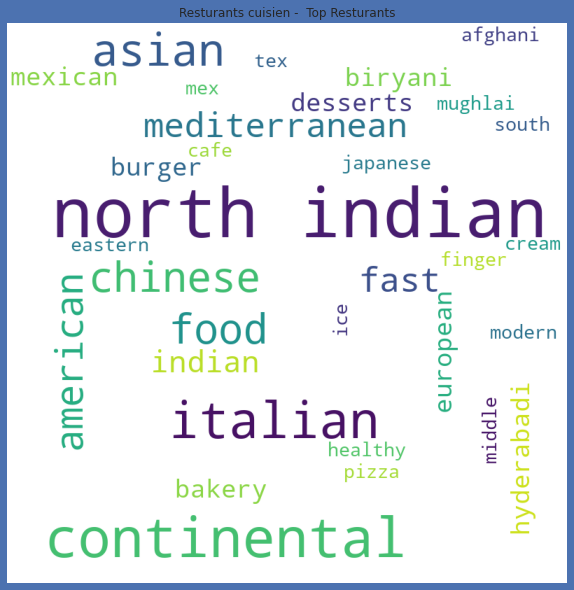

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
  
comment_words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in cuisien:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = 'b', edgecolor='g')
plt.title('Resturants cuisien -  Top Resturants')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

Top rated resturants seems to be doing well in the following cuisene

- North Indian
- Chinese
- Italian
- american

### Q3: How many of such resturants accept online delivery

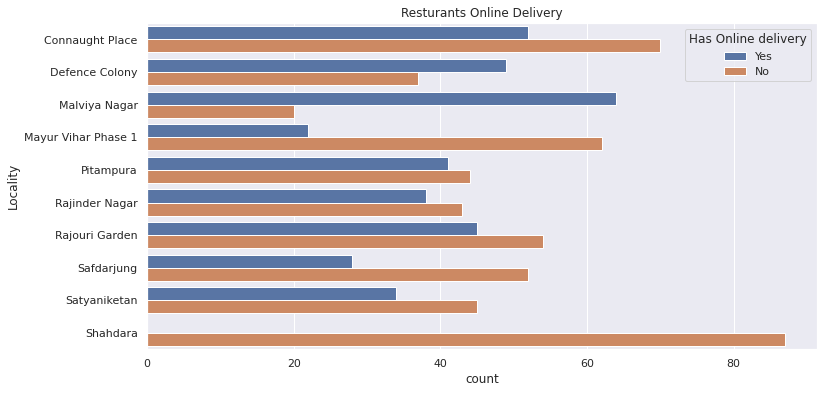

In [ ]:
top_locality = Delhi.Locality.value_counts().head(10)
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12,6))
ax = sns.countplot(y= "Locality", hue="Has Online delivery", data=Delhi[Delhi.Locality.isin(top_locality.index)])
plt.title('Resturants Online Delivery');

Apart from Shahdara locality, resturants in other locality accepts online delivery.

Online Delivery seems to be on higher side in Defence colony and Malvaiya Nagar

### Q4: Understanding the Resturants Rating localitywise.

Apart from Maliviya nagar, Defence colony in rest of the locality people seems to prefer visting the resturants rather ordering food online.

I would now like to understand the rating of these resturants that are providing online delivery in Maliviya nagar, Defence colony.

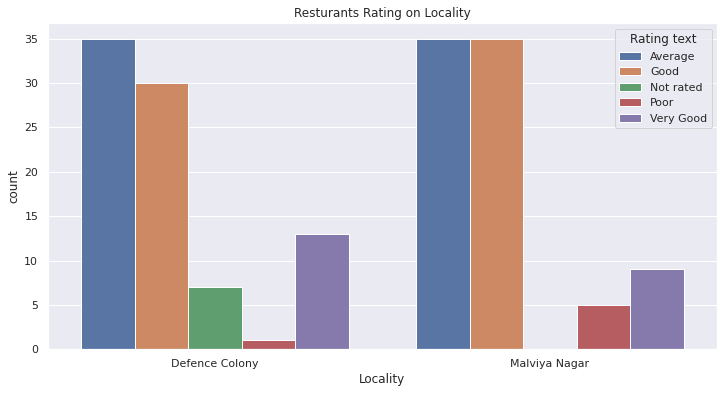

In [ ]:
DefenceColony_MalviNagar = Delhi[Delhi.Locality.isin(['Defence Colony', 'Malviya Nagar'])]
plt.figure(figsize=(12,6))
ax = sns.countplot(x= "Locality", hue="Rating text", data=DefenceColony_MalviNagar)
plt.title('Resturants Rating on Locality');

Defence colony seems to have high no of highly rated resturants but Malviya Nagar seems to done better in terms of Good and Average resturants.

As restarants with 'Poor' and 'Not Rated' is far lesser that 'Good', 'Very Good' and 'Excellent' resturants. Hence people in these localities prefer online ordering

### Q5: Rating VS Cost of dinning

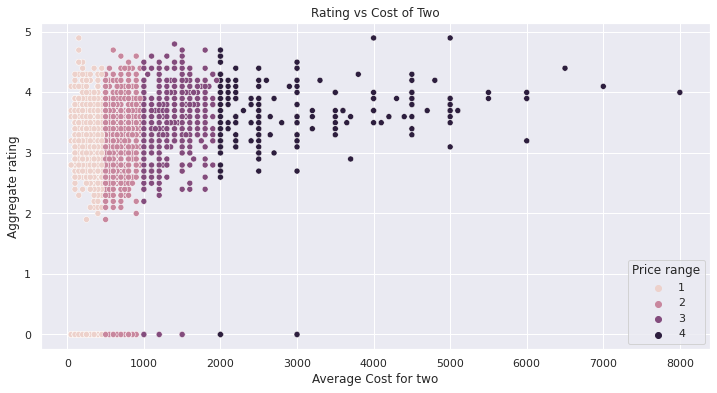

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="Average Cost for two", y="Aggregate rating", hue='Price range', data=Delhi)

plt.xlabel("Average Cost for two")
plt.ylabel("Aggregate rating")
plt.title('Rating vs Cost of Two');

I observe there is no linear relation between price and rating. For instance, Resturants with good rating (like 4-5) have resturants with all the price range and spread across the entire X axis

### Q6: Location of Higly rated resturants acorss New Delhi

In [ ]:
Delhi['Rating text'].value_counts()

Average      2495
Not rated    1425
Good         1128
Very Good     300
Poor           97
Excellent      28
Name: Rating text, dtype: int64

There seems to be around 28 resturants which have Excellent rating in New Delhi. Let me explore their location

In [ ]:
import plotly.express as px
Highly_rated = Delhi[Delhi['Rating text'].isin(['Excellent'])]

fig = px.scatter_mapbox(Highly_rated, lat="Latitude", lon="Longitude", hover_name="City", hover_data=["Aggregate rating", "Restaurant Name"],
                        color_discrete_sequence=["fuchsia"], zoom=10, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.update_layout(title='Highle rated Resturants Location',
#                   autosize=True,
#                   hovermode='closest',
#                   showlegend=False)
fig.update_layout(
    autosize=False,
    width=800,
    height=500,)

fig.show()


The aforementioned four cities represent nearly 65% of the total data available in the dataset. Apart from the higly rated local restaurants, it'd be intersting to know where the known-eateries that are commonplace. The verticles across which these can be located are -

- Breakfast
- American Fast Food
- Ice Creams, Shakes & Desserts

### Q7: Common Eateries

#### 1: Breakfast and Coffee locations

In [ ]:
types = {
    "Breakfast and Coffee" : ["Cafe Coffee Day", "Starbucks", "Barista", "Costa Coffee", "Chaayos", "Dunkin' Donuts"],
    "American": ["Domino's Pizza", "McDonald's", "Burger King", "Subway", "Dunkin' Donuts", "Pizza Hut"],
    "Ice Creams and Shakes": ["Keventers", "Giani", "Giani's", "Starbucks", "Baskin Robbins", "Nirula's Ice Cream"]
}

breakfast = Delhi[Delhi['Restaurant Name'].isin(types['Breakfast and Coffee'])]
american = Delhi[Delhi['Restaurant Name'].isin(types['American'])]
ice_cream = Delhi[Delhi['Restaurant Name'].isin(types['Ice Creams and Shakes'])]

In [ ]:
breakfast = breakfast[['Restaurant Name','Aggregate rating']].groupby('Restaurant Name').mean().reset_index().sort_values('Aggregate rating',ascending=False)
breakfast

,Restaurant Name,Aggregate rating
2,Chaayos,3.812500
5,Starbucks,3.750000
3,Costa Coffee,3.450000
0,Barista,3.325000
4,Dunkin' Donuts,3.300000
1,Cafe Coffee Day,2.573684


In [ ]:
import plotly.express as px

df= breakfast
fig = px.bar(df, y='Aggregate rating', x='Restaurant Name', text='Aggregate rating', title="Breakfast and Coffee locations")
fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')
fig.update_layout(
    autosize=False,
    width=800,
    height=500,)
fig.show()

Chaayos outlets are doing better. We need more of those in Delhi. Cafe coffe day seems to be perfroming poorly in avg rating. They are required to improve their services.

#### 2: Fast Food Resturants

In [ ]:
american = american[['Restaurant Name','Aggregate rating']].groupby('Restaurant Name').mean().reset_index().sort_values('Aggregate rating',ascending=False)
american

,Restaurant Name,Aggregate rating
0,Burger King,3.477778
3,McDonald's,3.445455
2,Dunkin' Donuts,3.300000
4,Pizza Hut,3.158333
5,Subway,3.047368
1,Domino's Pizza,2.794545


In [ ]:
import plotly.express as px

df= american
fig = px.bar(df, y='Aggregate rating', x='Restaurant Name', text='Aggregate rating', title="Fast Food Resturants")
fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')
fig.update_layout(
    autosize=False,
    width=800,
    height=500,)

fig.show()

Some Surprisingly facts - 
- Burger King is rated higher that McDonald's. 
- Domino's seems to have got least rating.
- Dunkin's donuts and Subway are rated over Domino's

#### 3: Ice Cream Parlours




In [ ]:
ice_cream = ice_cream[['Restaurant Name','Aggregate rating']].groupby('Restaurant Name').mean().reset_index().sort_values('Aggregate rating',ascending=False)
ice_cream

,Restaurant Name,Aggregate rating
5,Starbucks,3.750000
2,Giani's,3.011765
3,Keventers,2.983333
0,Baskin Robbins,2.769231
1,Giani,2.675000
4,Nirula's Ice Cream,2.400000


In [ ]:
import plotly.express as px

df= ice_cream
fig = px.bar(df, y='Aggregate rating', x='Restaurant Name', text='Aggregate rating', title="Ice Cream Parlours")
fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')
fig.update_layout(
    autosize=False,
    width=800,
    height=500,)
fig.show()



Forgin brands seems to be doing better than the local brands

## Inferences and Conclusions
We've drawn many inferences from the survey. Here's a summary of a few of them:

- The dataset is skewed towards India and doesnt represent the complete data of resturants worldwide.

- Resturants rating is categorised in six categories
  - Not Rated
  - Average
  - Good
  - Very Good
  - Excellent

- Connught Palace have maximum resturants listed on Zomato but in terms of online delivery accpetance Defence colony and maliva nagar seems to be doing better.

- The top rated resturants seems to be getting better rating on the following cuisine
  - North Indian
  - Chinese
  - american
  - Italian

- There is no relation between cost and rating. Some of the best rated resturants are low on cost and vica versa.

- On common Eateries, For Breakfast and Coffee location indian resturants seems to be better rated but for Fast food chain and Ice cream parlours american resturants seems to be doing better.



## References and Future Work
Check out the following resources to learn more about the dataset and tools used in this notebook:

- Zomato Restaurants Data: https://www.kaggle.com/shrutimehta/zomato-restaurants-data
- Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
- Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
- Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html
- opendatasets Python library: https://github.com/JovianML/opendatasets